In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 통계 정보 값이 너무 커서 지수로 표현될 떄 변환
pd.set_option("float_format", "{:.0f}".format)

# df 테이블 행 모두 출력되도록 펼치는 방법
pd.set_option('display.max_rows', 10000)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ML_외부데이터(1)추가_0322')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/서울시_구별_추가자료1.csv')
df2.head(3)

,Unnamed: 0,자치구명,공공안전시설총계,혐오시설,범죄발생건수,cctv수,사설학원 및 독서실,공공체육시설수,문화시설수,지하철역수,시내버스정류장수
0,0,종로구,32,4,3138,"2,031",248,18,189,15,189
1,1,중구,27,0,3071,"2,718",108,23,82,23,161
2,2,용산구,19,0,2967,"3,258",151,38,62,10,232


In [ ]:
s_df = pd.merge(df1, df2, how='left', on='자치구명')

In [ ]:
s_df.head()

,Unnamed: 0_x,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,...,Unnamed: 0_y,공공안전시설총계,혐오시설,범죄발생건수,cctv수,사설학원 및 독서실,공공체육시설수,문화시설수,지하철역수,시내버스정류장수
0,0,2017,강남구,논현동,46,2,1,139,70000,2003,...,22,30,3,6947,"7,721",2500,36,71,21,421
1,1,2017,강남구,삼성동,50,0,6,84,95000,2008,...,22,30,3,6947,"7,721",2500,36,71,21,421
2,2,2017,강남구,삼성동,50,0,5,84,87000,2008,...,22,30,3,6947,"7,721",2500,36,71,21,421
3,3,2017,강남구,삼성동,50,0,6,84,92000,2008,...,22,30,3,6947,"7,721",2500,36,71,21,421
4,4,2017,강남구,삼성동,50,0,1,84,85000,2008,...,22,30,3,6947,"7,721",2500,36,71,21,421


In [ ]:
s_df.columns

Index(['Unnamed: 0_x', '접수년도', '자치구명', '법정동명', '본번', '부번', '층', '임대면적',
       '전세가(만원)', '건축년도', '건물명', '평당 전세가(만원)', '초/중/고등학교수', '어린이집수', '대학교수',
       '병원수', '공원수', '관광명소수', '관공서수', 'Unnamed: 0_y', '공공안전시설총계', '혐오시설',
       '범죄발생건수', 'cctv수', '사설학원 및 독서실', '공공체육시설수', '문화시설수', '지하철역수',
       '시내버스정류장수'],
      dtype='object')

In [ ]:
s_df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,...,관공서수,공공안전시설총계,혐오시설,범죄발생건수,cctv수,사설학원 및 독서실,공공체육시설수,문화시설수,지하철역수,시내버스정류장수
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,...,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7675,...,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,...,NaN,NaN,NaN,NaN,"4,031",NaN,NaN,NaN,NaN,NaN
freq,NaN,77969,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,...,NaN,NaN,NaN,NaN,77969,NaN,NaN,NaN,NaN,NaN
mean,2020,NaN,NaN,593,5,9,74,46638,2001,NaN,...,64,24,2,3984,NaN,776,38,34,13,301
std,2,NaN,NaN,571,36,6,24,26471,11,NaN,...,26,4,1,1224,NaN,584,11,21,7,85
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,...,25,15,0,2141,NaN,108,16,15,1,140
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,...,46,22,1,3169,NaN,397,28,22,8,250
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,...,62,23,2,3857,NaN,699,38,26,12,289
75%,2022,NaN,NaN,800,0,13,85,58500,2010,NaN,...,73,28,3,4663,NaN,1038,43,45,14,394


In [ ]:
s_df['cctv수'] = s_df['cctv수'].str.replace(',', '').astype(int)
s_df['cctv수'].head()

0    7721
1    7721
2    7721
3    7721
4    7721
Name: cctv수, dtype: int64

In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,...,관공서수,공공안전시설총계,혐오시설,범죄발생건수,cctv수,사설학원 및 독서실,공공체육시설수,문화시설수,지하철역수,시내버스정류장수
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,...,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,77969,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020,NaN,NaN,593,5,9,74,46638,2001,NaN,...,64,24,2,3984,4237,776,38,34,13,301
std,2,NaN,NaN,571,36,6,24,26471,11,NaN,...,26,4,1,1224,1305,584,11,21,7,85
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,...,25,15,0,2141,2031,108,16,15,1,140
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,...,46,22,1,3169,3268,397,28,22,8,250
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,...,62,23,2,3857,4031,699,38,26,12,289
75%,2022,NaN,NaN,800,0,13,85,58500,2010,NaN,...,73,28,3,4663,4578,1038,43,45,14,394


In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
초/중/고등학교수     0
어린이집수         0
대학교수          0
병원수           0
공원수           0
관광명소수         0
관공서수          0
공공안전시설총계      0
혐오시설          0
범죄발생건수        0
cctv수         0
사설학원 및 독서실    0
공공체육시설수       0
문화시설수         0
지하철역수         0
시내버스정류장수      0
dtype: int64

In [ ]:
s_df.reset_index(drop=True, inplace=True)

In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,...,관공서수,공공안전시설총계,혐오시설,범죄발생건수,cctv수,사설학원 및 독서실,공공체육시설수,문화시설수,지하철역수,시내버스정류장수
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,...,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,77969,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020,NaN,NaN,593,5,9,74,46638,2001,NaN,...,64,24,2,3984,4237,776,38,34,13,301
std,2,NaN,NaN,571,36,6,24,26471,11,NaN,...,26,4,1,1224,1305,584,11,21,7,85
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,...,25,15,0,2141,2031,108,16,15,1,140
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,...,46,22,1,3169,3268,397,28,22,8,250
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,...,62,23,2,3857,4031,699,38,26,12,289
75%,2022,NaN,NaN,800,0,13,85,58500,2010,NaN,...,73,28,3,4663,4578,1038,43,45,14,394


In [ ]:
# 연속형 데이터에 대한 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def numeric_sc(df):
    mm_sc = MinMaxScaler()
    sd_sc = StandardScaler()

    sd_sc.fit(s_df[['임대면적','건축년도']])
    df[['임대면적sc', '건축년도sc']] = sd_sc.transform(df[['임대면적', '건축년도']])

    mm_sc.fit(s_df[['층']])
    df[['층mm']] = mm_sc.transform(df[['층']])

    return df

numeric_sc(s_df).describe()

,접수년도,본번,부번,층,임대면적,전세가(만원),건축년도,평당 전세가(만원),초/중/고등학교수,어린이집수,...,범죄발생건수,cctv수,사설학원 및 독서실,공공체육시설수,문화시설수,지하철역수,시내버스정류장수,임대면적sc,건축년도sc,층mm
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,...,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
mean,2020,593,5,9,74,46638,2001,636,66,219,...,3984,4237,776,38,34,13,301,-0,-0,0
std,2,571,36,6,24,26471,11,281,20,67,...,1224,1305,584,11,21,7,85,1,1,0
min,2017,0,0,1,10,500,1961,4,35,64,...,2141,2031,108,16,15,1,140,-3,-4,0
25%,2019,199,0,4,60,29000,1992,447,48,170,...,3169,3268,397,28,22,8,250,-1,-1,0
50%,2020,501,0,8,76,42000,2001,588,62,210,...,3857,4031,699,38,26,12,289,0,-0,0
75%,2022,800,0,13,85,58500,2010,767,84,266,...,4663,4578,1038,43,45,14,394,0,1,0
max,2024,4974,2837,67,150,290000,2024,2000,101,335,...,6947,7721,2500,62,189,28,437,3,2,1


In [ ]:
# 범주형 데이터에 대한 인코딩
!pip install category_encoders
import category_encoders as ce

def get_category(df):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder

    le = LabelEncoder()
    oh1 = OneHotEncoder()
    oh2 = OneHotEncoder()
    oh3 = OneHotEncoder()
    be = ce.BinaryEncoder()

    #le.fit(s_df[['자치구명']])
    #df['자치구명le'] = le.transform(df['자치구명'])
    # 각 고유 숫자마다 가중치로 인식되는 문제.. (해당 인코딩은 랜덤포레스트 사용 시)
    df.reset_index(drop=True, inplace=True)

    le.fit(s_df[['접수년도']])
    df['접수년도le'] = le.transform(df[['접수년도']])

    # 범주형 변수 이진 벡터로 변환하여 새로운 열 추가
    oh1.fit(s_df[['자치구명']])
    자치구명_csr = oh1.transform(df[['자치구명']])

    자치구명_csr_df = pd.DataFrame(자치구명_csr.toarray(),
                               columns = oh1.get_feature_names_out())
    df = pd.concat([df, 자치구명_csr_df], axis=1)

    # Target Encoder 초기화
    encoder = ce.TargetEncoder(cols=['법정동명'])
    df_encoded = encoder.fit_transform(df['법정동명'], df['전세가(만원)'])
    df_encoded.columns = ['법정동명te']
    df = pd.concat([df, df_encoded], axis=1)
    return df

s_df = get_category(s_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,...,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명te
count,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478,...,881478,881478,881478,881478,881478,881478,881478,881478,881478,881478
unique,NaN,25,335,NaN,NaN,NaN,NaN,NaN,NaN,7675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,77969,31788,NaN,NaN,NaN,NaN,NaN,NaN,6964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020,NaN,NaN,593,5,9,74,46638,2001,NaN,...,0,0,0,0,0,0,0,0,0,46643
std,2,NaN,NaN,571,36,6,24,26471,11,NaN,...,0,0,0,0,0,0,0,0,0,16239
min,2017,NaN,NaN,0,0,1,10,500,1961,NaN,...,0,0,0,0,0,0,0,0,0,11858
25%,2019,NaN,NaN,199,0,4,60,29000,1992,NaN,...,0,0,0,0,0,0,0,0,0,34405
50%,2020,NaN,NaN,501,0,8,76,42000,2001,NaN,...,0,0,0,0,0,0,0,0,0,43376
75%,2022,NaN,NaN,800,0,13,85,58500,2010,NaN,...,0,0,0,0,0,0,0,0,0,57945


In [ ]:
s_df.columns

Index(['접수년도', '자치구명', '법정동명', '본번', '부번', '층', '임대면적', '전세가(만원)', '건축년도',
       '건물명', '평당 전세가(만원)', '초/중/고등학교수', '어린이집수', '대학교수', '병원수', '공원수',
       '관광명소수', '관공서수', '공공안전시설총계', '혐오시설', '범죄발생건수', 'cctv수', '사설학원 및 독서실',
       '공공체육시설수', '문화시설수', '지하철역수', '시내버스정류장수', '임대면적sc', '건축년도sc', '층mm',
       '접수년도le', '자치구명_강남구', '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구',
       '자치구명_광진구', '자치구명_구로구', '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구', '자치구명_동대문구',
       '자치구명_동작구', '자치구명_마포구', '자치구명_서대문구', '자치구명_서초구', '자치구명_성동구', '자치구명_성북구',
       '자치구명_송파구', '자치구명_양천구', '자치구명_영등포구', '자치구명_용산구', '자치구명_은평구', '자치구명_종로구',
       '자치구명_중구', '자치구명_중랑구', '법정동명te'],
      dtype='object')

In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
초/중/고등학교수     0
어린이집수         0
대학교수          0
병원수           0
공원수           0
관광명소수         0
관공서수          0
공공안전시설총계      0
혐오시설          0
범죄발생건수        0
cctv수         0
사설학원 및 독서실    0
공공체육시설수       0
문화시설수         0
지하철역수         0
시내버스정류장수      0
임대면적sc        0
건축년도sc        0
층mm           0
접수년도le        0
자치구명_강남구      0
자치구명_강동구      0
자치구명_강북구      0
자치구명_강서구      0
자치구명_관악구      0
자치구명_광진구      0
자치구명_구로구      0
자치구명_금천구      0
자치구명_노원구      0
자치구명_도봉구      0
자치구명_동대문구     0
자치구명_동작구      0
자치구명_마포구      0
자치구명_서대문구     0
자치구명_서초구      0
자치구명_성동구      0
자치구명_성북구      0
자치구명_송파구      0
자치구명_양천구      0
자치구명_영등포구     0
자치구명_용산구      0
자치구명_은평구      0
자치구명_종로구      0
자치구명_중구       0
자치구명_중랑구      0
법정동명te        0
dtype: int64

In [ ]:
# X, y 훈련/테스트 변수 설정
from sklearn.model_selection import train_test_split

X = s_df[['임대면적sc', '건축년도sc','층mm', '접수년도le', '본번', '부번',
        '자치구명_강남구', '자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구',
        '자치구명_광진구', '자치구명_구로구', '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구',
        '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구', '자치구명_서대문구', '자치구명_서초구',
        '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구', '자치구명_영등포구',
        '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
        '법정동명te', '초/중/고등학교수', '어린이집수', '대학교수', '병원수', '공원수', '관광명소수', '관공서수',
        '공공안전시설총계', '혐오시설', '범죄발생건수', 'cctv수', '사설학원 및 독서실', '공공체육시설수', '문화시설수', '지하철역수', '시내버스정류장수']]
y = s_df['전세가(만원)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 훈련/테스트 갯수 확인
len(X_train), len(y_train), len(X_test), len(y_test)

(705182, 705182, 176296, 176296)

In [ ]:
# 랜덤포레스트모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#+a MAE, MSE, RMSE, R-squared(수정된 R2도 고민)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=10)
model_rf.fit(X_train, y_train)

y_rf_pred = model_rf.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('rf ', y_test, y_rf_pred)

rf  MAE:  5028.41 , MSE:  69240282.49 , RMSE:  8321.07 , R2 Score:  0.9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


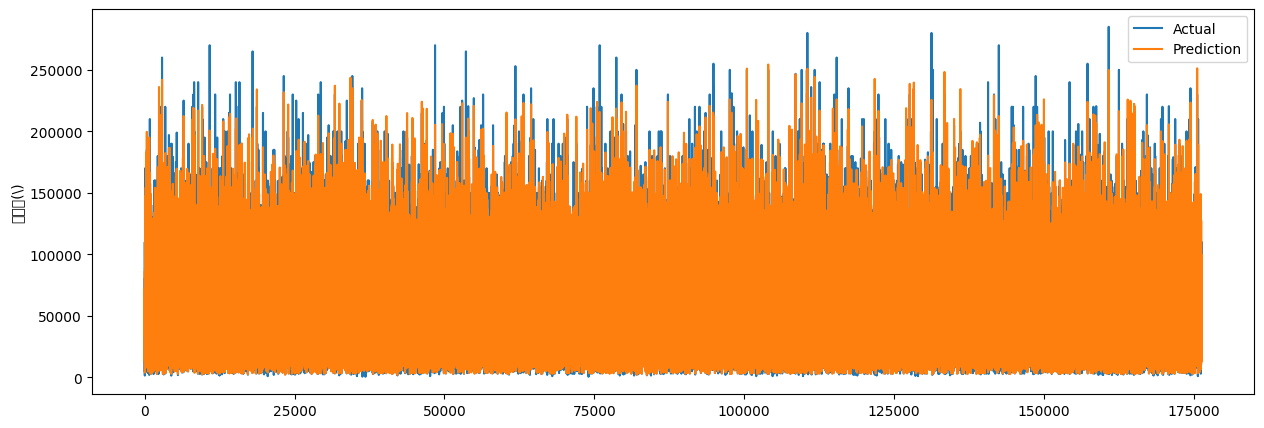

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_rf_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("변수 중요도:")
for i, index in enumerate(sorted_indices):
    feature = X.columns[index]
    importance = round(importances[index], 4)
    print(f"{i+1}. {feature}: {importance}")

변수 중요도:
1. 법정동명te: 0.3785
2. 임대면적sc: 0.3352
3. 건축년도sc: 0.119
4. 접수년도le: 0.0567
5. 본번: 0.0316
6. 층mm: 0.0251
7. 부번: 0.0094
8. cctv수: 0.009
9. 사설학원 및 독서실: 0.0053
10. 범죄발생건수: 0.0031
11. 관광명소수: 0.0029
12. 문화시설수: 0.0029
13. 시내버스정류장수: 0.0027
14. 병원수: 0.0026
15. 지하철역수: 0.0021
16. 초/중/고등학교수: 0.002
17. 관공서수: 0.002
18. 공공안전시설총계: 0.0016
19. 공공체육시설수: 0.0013
20. 대학교수: 0.0012
21. 공원수: 0.0011
22. 어린이집수: 0.001
23. 혐오시설: 0.0009
24. 자치구명_강남구: 0.0009
25. 자치구명_양천구: 0.0004
26. 자치구명_마포구: 0.0003
27. 자치구명_서초구: 0.0002
28. 자치구명_은평구: 0.0002
29. 자치구명_강동구: 0.0001
30. 자치구명_송파구: 0.0001
31. 자치구명_영등포구: 0.0001
32. 자치구명_성동구: 0.0001
33. 자치구명_용산구: 0.0001
34. 자치구명_동작구: 0.0001
35. 자치구명_구로구: 0.0001
36. 자치구명_성북구: 0.0
37. 자치구명_광진구: 0.0
38. 자치구명_강서구: 0.0
39. 자치구명_동대문구: 0.0
40. 자치구명_서대문구: 0.0
41. 자치구명_중랑구: 0.0
42. 자치구명_중구: 0.0
43. 자치구명_노원구: 0.0
44. 자치구명_종로구: 0.0
45. 자치구명_관악구: 0.0
46. 자치구명_금천구: 0.0
47. 자치구명_강북구: 0.0
48. 자치구명_도봉구: 0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 120, 140],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [4, 6, 8]
}
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv =5)
grid_search.fit(X_train, y_train)